
1) f(x)=3x^2−5x+1 -> f'(x), x=2
f(2) = 3
f'(x)=6x-5, f'(2) = 7

2) f(x,y)=x^2+4y -> ∇f, (1,-1)
∇f(x,y) = [2x, 4]
(1,-1) -> ∇f = [2. 4.]

3) Градиент интерпретациясы
Градиент бағыты — функцияның ең тез ӨСУ бағыты.
Минимизацияда -∇ қолданылады, себебі ол ең тез КЕМУ бағыты.

4) J(θ)=(θ−5)^2, η=0.1, 20 итерация
iter= 0  theta= 0.000000  J= 25.000000
iter= 1  theta= 1.000000  J= 16.000000
iter= 2  theta= 1.800000  J= 10.240000
iter= 3  theta= 2.440000  J= 6.553600
iter= 4  theta= 2.952000  J= 4.194304
iter= 5  theta= 3.361600  J= 2.684355
iter= 6  theta= 3.689280  J= 1.717987
iter= 7  theta= 3.951424  J= 1.099512
iter= 8  theta= 4.161139  J= 0.703687
iter= 9  theta= 4.328911  J= 0.450360
iter=10  theta= 4.463129  J= 0.288230
iter=11  theta= 4.570503  J= 0.184467
iter=12  theta= 4.656403  J= 0.118059
iter=13  theta= 4.725122  J= 0.075558
iter=14  theta= 4.780098  J= 0.048357
iter=15  theta= 4.824078  J= 0.030949
iter=16  theta= 4.859263  J= 0.019807
iter=17  theta= 4.887410  J= 0.012677
it

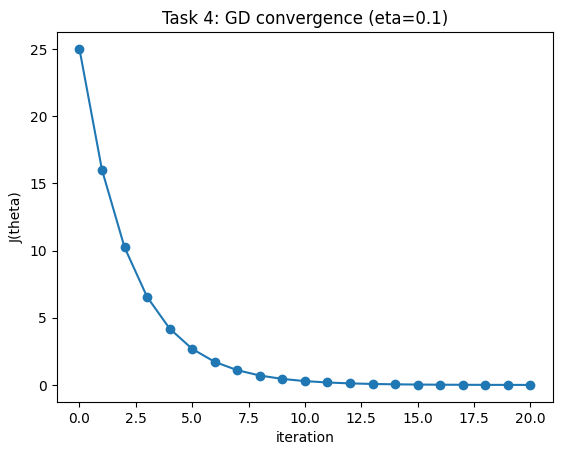


5) η=0.01, 0.1, 1.0 — салыстыру (20 итерация)

η=0.01
iter= 0  theta= 0.000000  J= 25.000000
iter= 1  theta= 0.100000  J= 24.010000
iter= 2  theta= 0.198000  J= 23.059204
iter= 3  theta= 0.294040  J= 22.146060
iter= 4  theta= 0.388159  J= 21.269076
iter= 5  theta= 0.480396  J= 20.426820
... соңғы: iter=20 theta= 1.661960 J= 11.142510

η=0.1
iter= 0  theta= 0.000000  J= 25.000000
iter= 1  theta= 1.000000  J= 16.000000
iter= 2  theta= 1.800000  J= 10.240000
iter= 3  theta= 2.440000  J= 6.553600
iter= 4  theta= 2.952000  J= 4.194304
iter= 5  theta= 3.361600  J= 2.684355
... соңғы: iter=20 theta= 4.942354 J= 0.003323

η=1.0
iter= 0  theta= 0.000000  J= 25.000000
iter= 1  theta= 10.000000  J= 25.000000
iter= 2  theta= 0.000000  J= 25.000000
iter= 3  theta= 10.000000  J= 25.000000
iter= 4  theta= 0.000000  J= 25.000000
iter= 5  theta= 10.000000  J= 25.000000
... соңғы: iter=20 theta= 0.000000 J= 25.000000

Қорытынды: η тым кіші болса — баяу; η тым үлкен болса — тербеліс/ажырау мүмкін.

6) J

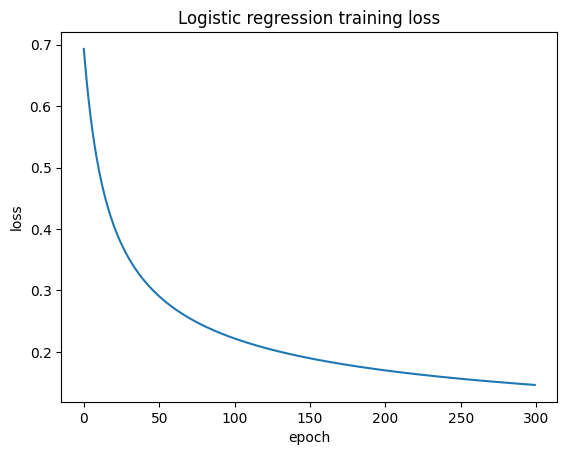


16) Capstone: Linear Regression from scratch (MSE + GD + L2)
Final loss: 8.697977248750236
w_orig: 2.8887738214026477 b_orig: -0.11633953177235767


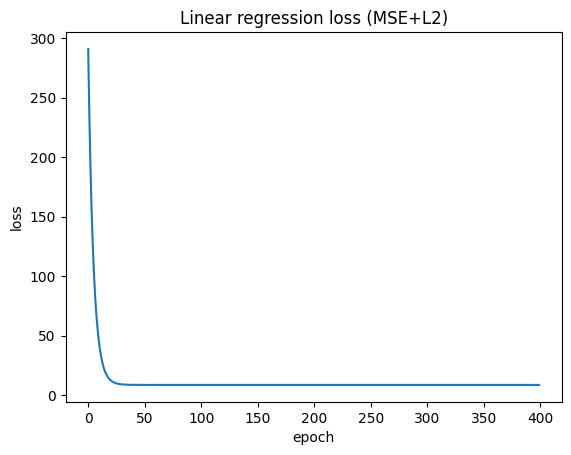

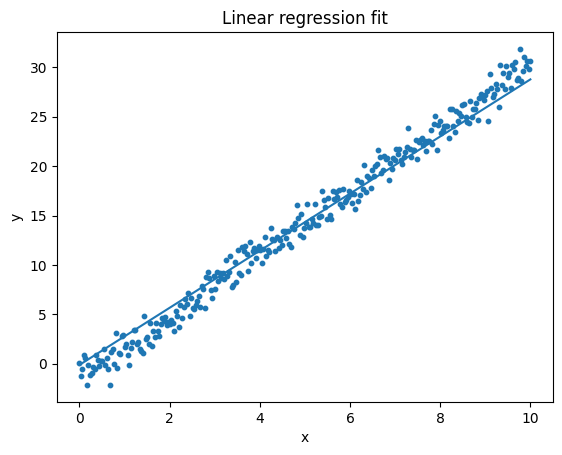

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def header(t):
    print("\n" + "="*90)
    print(t)
    print("="*90)

# ---------------------------
# 🟢 1-деңгей
# ---------------------------
header("1) f(x)=3x^2−5x+1 -> f'(x), x=2")

def f1(x):
    return 3*x**2 - 5*x + 1

def df1(x):
    return 6*x - 5   # аналитикалық туынды

x = 2
print("f(2) =", f1(x))
print("f'(x)=6x-5, f'(2) =", df1(x))


header("2) f(x,y)=x^2+4y -> ∇f, (1,-1)")

def grad_f2(x, y):
    # df/dx = 2x, df/dy = 4
    return np.array([2*x, 4.0])

pt = (1, -1)
print("∇f(x,y) = [2x, 4]")
print("(1,-1) -> ∇f =", grad_f2(*pt))


header("3) Градиент интерпретациясы")
print("Градиент бағыты — функцияның ең тез ӨСУ бағыты.")
print("Минимизацияда -∇ қолданылады, себебі ол ең тез КЕМУ бағыты.")


# ---------------------------
# 🟡 2-деңгей (Gradient Descent)
# ---------------------------
header("4) J(θ)=(θ−5)^2, η=0.1, 20 итерация")

def J(theta):
    return (theta - 5)**2

def dJ(theta):
    return 2*(theta - 5)

eta = 0.1
theta = 0.0

thetas = [theta]
losses = [J(theta)]

for i in range(20):
    theta = theta - eta*dJ(theta)
    thetas.append(theta)
    losses.append(J(theta))

for i in range(21):
    print(f"iter={i:2d}  theta={thetas[i]: .6f}  J={losses[i]: .6f}")

plt.figure()
plt.plot(range(21), losses, marker="o")
plt.xlabel("iteration")
plt.ylabel("J(theta)")
plt.title("Task 4: GD convergence (eta=0.1)")
plt.show()


header("5) η=0.01, 0.1, 1.0 — салыстыру (20 итерация)")

def run_gd(eta, iters=20, theta0=0.0):
    theta = theta0
    traj = [(0, theta, J(theta))]
    for i in range(1, iters+1):
        theta = theta - eta*dJ(theta)
        traj.append((i, theta, J(theta)))
    return traj

for eta in [0.01, 0.1, 1.0]:
    traj = run_gd(eta)
    print(f"\nη={eta}")
    for i, th, j in traj[:6]:
        print(f"iter={i:2d}  theta={th: .6f}  J={j: .6f}")
    i, th, j = traj[-1]
    print(f"... соңғы: iter={i} theta={th: .6f} J={j: .6f}")

print("\nҚорытынды: η тым кіші болса — баяу; η тым үлкен болса — тербеліс/ажырау мүмкін.")


header("6) J(x,y)=x^2+y^2, бастапқы (3,-4), η=0.1, 20 итерация")

def J_xy(x, y):
    return x**2 + y**2

def grad_xy(x, y):
    return np.array([2*x, 2*y])

eta = 0.1
x, y = 3.0, -4.0
traj = []

for i in range(21):
    traj.append((i, x, y, J_xy(x, y)))
    g = grad_xy(x, y)
    x, y = (np.array([x, y]) - eta*g)

for i, x, y, j in traj:
    if i < 6 or i in [10, 20]:
        print(f"iter={i:2d}  (x,y)=({x: .6f},{y: .6f})  J={j: .6f}")


# ---------------------------
# 🟠 3-деңгей (Loss)
# ---------------------------
header("7) MSE: y=[2,4,6], y_pred=[2.5,3.5,5.0]")

y_true = np.array([2, 4, 6], dtype=float)
y_pred = np.array([2.5, 3.5, 5.0], dtype=float)

mse = np.mean((y_true - y_pred)**2)
print("MSE =", mse)


header("8) Binary Cross-Entropy: y=[1,0,1,1], p=[0.9,0.2,0.7,0.4]")

y = np.array([1, 0, 1, 1], dtype=float)
p = np.array([0.9, 0.2, 0.7, 0.4], dtype=float)

eps = 1e-12
p = np.clip(p, eps, 1-eps)

ce = -np.mean(y*np.log(p) + (1-y)*np.log(1-p))
print("Cross-Entropy =", ce)


header("9) Hinge Loss: y=[1,-1,1], y_pred=[0.3,-0.2,1.5]")

y = np.array([1, -1, 1], dtype=float)
yp = np.array([0.3, -0.2, 1.5], dtype=float)

hinge = np.maximum(0, 1 - y*yp)
print("hinge per-sample:", hinge)
print("hinge mean:", hinge.mean())


# ---------------------------
# 🔵 4-деңгей (Regularization)
# ---------------------------
header("10) L1 vs L2: theta=[2.0,-0.5,0.1], λ=0.1")

theta = np.array([2.0, -0.5, 0.1])
lam = 0.1

L1 = lam * np.sum(np.abs(theta))
L2 = lam * np.sum(theta**2)

print("L1 penalty =", L1)
print("L2 penalty =", L2)


# ---------------------------
# 🔴 5-деңгей (Newton)
# ---------------------------
header("12) Newton: f(x)=x^2−6x+8, x0=0, 5 итерация")

def f12(x):
    return x**2 - 6*x + 8

def df12(x):
    return 2*x - 6

def ddf12(x):
    return 2.0

x = 0.0
for i in range(1, 6):
    x_new = x - df12(x)/ddf12(x)
    print(f"iter={i} x={x: .6f} f(x)={f12(x): .6f} -> x_new={x_new: .6f}")
    x = x_new


header("13) f(x)=(x−4)^2: GD vs Newton итерация саны")

def f13(x):
    return (x - 4)**2

def df13(x):
    return 2*(x - 4)

def ddf13(x):
    return 2.0

# GD
eta = 0.1
x = 0.0
for i in range(1, 501):
    x = x - eta*df13(x)
    if abs(x - 4) < 1e-6:
        gd_iters = i
        break
else:
    gd_iters = 500
print("GD iters:", gd_iters)

# Newton
x = 0.0
for i in range(1, 50):
    x = x - df13(x)/ddf13(x)
    if abs(x - 4) < 1e-6:
        newton_iters = i
        break
else:
    newton_iters = 50
print("Newton iters:", newton_iters)


# ---------------------------
# 🟣 6-деңгей (Advanced)
# ---------------------------
header("14) Logistic Regression (from scratch) — toy data")

np.random.seed(42)
n = 200
X = np.random.randn(n, 2)
true_w = np.array([1.5, -2.0])
true_b = 0.3

logits = X @ true_w + true_b
y = (logits > 0).astype(float)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def cross_entropy(y, p):
    eps = 1e-12
    p = np.clip(p, eps, 1-eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

w = np.zeros(2)
b = 0.0
lr = 0.2
epochs = 300
losses = []

for t in range(epochs):
    z = X @ w + b
    p = sigmoid(z)
    loss = cross_entropy(y, p)
    losses.append(loss)
    dw = (1/n) * (X.T @ (p - y))
    db = (1/n) * np.sum(p - y)
    w -= lr*dw
    b -= lr*db

pred = (sigmoid(X @ w + b) >= 0.5).astype(float)
acc = np.mean(pred == y)

print("Final loss:", losses[-1])
print("Final acc :", acc)
print("w, b:", w, b)

plt.figure()
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Logistic regression training loss")
plt.show()


header("16) Capstone: Linear Regression from scratch (MSE + GD + L2)")

np.random.seed(0)
n = 300
X = np.linspace(0, 10, n).reshape(-1, 1)
y = 3.2*X.ravel() - 1.7 + np.random.randn(n)*1.0
y = y.reshape(-1, 1)

# standardize X
X_mean = X.mean(axis=0, keepdims=True)
X_std  = X.std(axis=0, keepdims=True) + 1e-12
Xs = (X - X_mean)/X_std

w = np.zeros((1, 1))
b = 0.0
lr = 0.05
lam = 0.1
epochs = 400
losses = []

def mse_loss(y, yhat):
    return np.mean((y - yhat)**2)

for t in range(epochs):
    yhat = Xs @ w + b
    loss = mse_loss(y, yhat) + lam*np.sum(w**2)
    losses.append(loss)
    err = yhat - y
    dw = (2/n) * (Xs.T @ err) + 2*lam*w
    db = (2/n) * float(np.sum(err))
    w -= lr*dw
    b -= lr*db

print("Final loss:", losses[-1])

# back to original scale
w_orig = (w / X_std.reshape(1, 1)).ravel()[0]
b_orig = (b - (w * (X_mean/X_std).reshape(1, 1))).ravel()[0]
print("w_orig:", w_orig, "b_orig:", b_orig)

plt.figure()
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Linear regression loss (MSE+L2)")
plt.show()

plt.figure()
plt.scatter(X.ravel(), y.ravel(), s=10)
plt.plot(X.ravel(), w_orig*X.ravel() + b_orig)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression fit")
plt.show()